In [99]:
import numpy as np
from pyteomics import mass
import re
import matplotlib.pyplot as plt

In [37]:
aa3 = ["Ala", "Arg", "Asn", "Asp", "Cys", "Gln", "Glu", "Gly", "His", "Ile", "Leu", "Lys", "Met", "Phe", "Pro", "Ser", "Thr", "Trp", "Tyr", "Val"]
aa1 = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
masses = [89.09, 174.20, 132.12, 133.10, 121.16, 146.15, 147.13, 75.07, 155.16, 131.18, 131.18, 146.19, 149.21, 165.19, 115.13, 105.09, 119.12, 204.23, 181.19, 117.15]
aa1_to_m = dict(zip(aa1, masses))

mod_masses = np.random.uniform(50,150,5)
mod_ids = ["[X]", "[Z]", "[O]", "[U]", "[J]"]
mods_to_m = dict(zip(mod_ids, mod_masses))

#aa1_to_m

In [131]:
def fragments_mass(peptide, types=('b', 'y')): # adapted from pyteomics tutorials
    """
    The function generates all possible m/z for fragments of types
    `types` and of charges from 1 to `maxharge`.
    """
    
    for i in range(1, len(peptide)):
        for ion_type in types:
            if ion_type[0] in 'abc':
                mods_present = re.findall("\[\w*\]", peptide[:i])
                if mods_present:
                    mods_mass = sum([mods_to_m[re.sub('\[|\]', '', i)] for i in mods_present])
                    peptide = re.sub('\[\w*\]', '', peptide)
                    if ion_type[0] in 'abc':
                        yield mass.fast_mass(
                                peptide[:i], ion_type=ion_type, charge=1) + mods_mass
                else:
                    yield mass.fast_mass(
                        peptide[:i], ion_type=ion_type, charge=1)
            else:
                if ion_type[0] in 'abc':
                    yield mass.fast_mass(
                            peptide[:i], ion_type=ion_type, charge=1)
                else:
                    yield mass.fast_mass(
                        peptide[i:], ion_type=ion_type, charge=1)
            

In [132]:
np.random.seed(1)
base_seq = list(np.random.choice(aa1, 15))
full_seq = base_seq.copy()

n_mods = 3
mod_pos = np.random.randint(0, len(base_seq)-1, n_mods)
mod_sel = np.random.randint(0, len(mod_ids)-1, n_mods)
for i in range(n_mods):
    full_seq.insert(mod_pos[i], mod_ids[mod_sel[i]])

''.join(base_seq), ''.join(full_seq)

('QKMHIKQSATRMGFE', 'QK[Z]M[O]HIKQSA[O]TRMGFE')

In [133]:
re.search("\[\w*\]", ''.join(full_seq))
[m.span() for m in re.finditer("\[\w*\]", ''.join(full_seq))]
re.findall("\w\[\w*\]", ''.join(full_seq)), re.sub("\w\[\w*\]", '', ''.join(full_seq))
x=fragments_mass(''.join(full_seq))
x

QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE
QK[Z]M[O]HIKQSA[O]TRMGFE


KeyError: 'Z'

In [118]:
base_frags = [i for i in fragments_mass(''.join(base_seq))]
full_frags = [i for i in fragments_mass(''.join(full_seq))]

TypeError: 'NoneType' object is not iterable

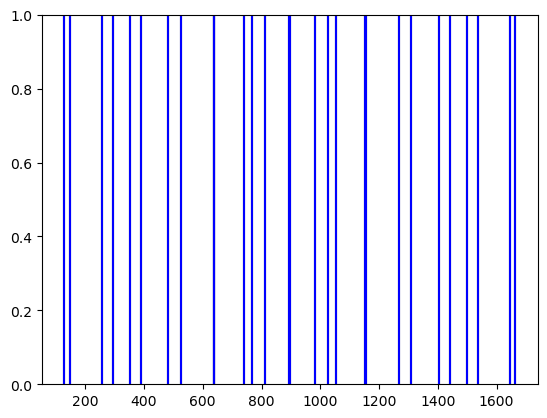

In [103]:
for i in base_frags:
    plt.axvline(i, c='k')

for i in full_frags:
    plt.axvline(i, c='b')